# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Текст ссылки](https://)Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Аналитика портфолио/bank_clients_transactions.csv')

In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split()
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

# Применяем функцию ко всем столбцам DataFrame
df.columns = [to_camel_case(col) for col in df.columns]

# Проверяем результат
print(df.columns)

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount(inr)'],
      dtype='object')


In [ ]:
df.isna().sum()

,0
transactionid,0
customerid,0
customerdob,3397
custgender,1100
custlocation,151
custaccountbalance,2369
transactiondate,0
transactiontime,0
transactionamount(inr),0


In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

,0
transactionid,0
customerid,0
customerdob,0
custgender,0
custlocation,0
custaccountbalance,0
transactiondate,0
transactiontime,0
transactionamount(inr),0


In [ ]:
balance_stats = df['custaccountbalance'].describe()

# Основные статистические показатели по сумме транзакций
transaction_stats = df['transactionamount(inr)'].describe()

print("Статистика по балансу:\n", balance_stats)
print("\nСтатистика по сумме транзакций:\n", transaction_stats)



Статистика по балансу:
 count    1.041614e+06
mean     1.149986e+05
std      8.467609e+05
min      0.000000e+00
25%      4.728140e+03
50%      1.676852e+04
75%      5.742885e+04
max      1.150355e+08
Name: custaccountbalance, dtype: float64

Статистика по сумме транзакций:
 count    1.041614e+06
mean     1.566096e+03
std      6.561464e+03
min      0.000000e+00
25%      1.600000e+02
50%      4.575000e+02
75%      1.200000e+03
max      1.560035e+06
Name: transactionamount(inr), dtype: float64


Исключим выборсы
- Для баланса:
  - Q1 (25%): 4,728.14
  - Q3 (75%): 57,428.85
  - IQR = Q3 - Q1 = 52,700.71
  - Нижняя граница = 4,728.14 - 1.5 * 52,700.71 = 0 (меньше нуля не может быть)
  - Верхняя граница = 57,428.85 + 1.5 * 52,700.71 = 136479,915

- Для суммы транзакций:
  - Q1 (25%): 160
  - Q3 (75%): 1,200
  - IQR = 1,200 - 160 = 1,040
  - Нижняя граница = 160 - 1.5 * 1,040 = 0 (меньше нуля не может быть)
  - Верхняя граница = 1,200 + 1.5 * 1,040=2760

In [ ]:
# очистим данные от выбросов
# Задаем условия для фильтрации
balance_condition = (df['custaccountbalance'] >= 0) & (df['custaccountbalance'] <= 136480)
transaction_condition = (df['transactionamount(inr)'] >= 0) & (df['transactionamount(inr)'] <= 2760)

# Применяем условия фильтрации
df = df[balance_condition & transaction_condition]




In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.0
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.0
...,...,...,...,...,...,...,...,...,...
1048561,T1048562,C1034220,19/11/92,M,BANGALORE,1212.70,18/9/16,184734,1500.0
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение типов данных

In [ ]:
import pandas as pd
import numpy as np


def convert_date(date_str):
    if not pd.isna(date_str):
        day, month, year = map(int, date_str.split('/'))
        if year < 30:  # Если год меньше 16, это 2000 года
            year += 2000
        else:  # Если год 16 или больше, это 1900 года
            year += 1900
        return pd.Timestamp(year, month, day)
    return np.nan

# Преобразуем customerdob и transactiondate
df['customerdob'] = df['customerdob'].apply(convert_date)
df['transactiondate'] = pd.to_datetime(df['transactiondate'], dayfirst=True)
#df['transactiondate'] = df['transactiondate'].apply(convert_date)

# Вывод результата
print(df)





        transactionid customerid          customerdob custgender  \
0                  T1   C5841053  1994-01-10 00:00:00          F   
2                  T3   C4417068  1996-11-26 00:00:00          F   
4                  T5   C9031234  1988-03-24 00:00:00          F   
5                  T6   C1536588  1972-10-08 00:00:00          F   
6                  T7   C7126560  1992-01-26 00:00:00          F   
...               ...        ...                  ...        ...   
1048561      T1048562   C1034220  1992-11-19 00:00:00          M   
1048562      T1048563   C8020229  1990-04-08 00:00:00          M   
1048563      T1048564   C6459278  1992-02-20 00:00:00          M   
1048565      T1048566   C6420483  1978-08-30 00:00:00          M   
1048566      T1048567   C8337524  1984-03-05 00:00:00          M   

          custlocation  custaccountbalance transactiondate  transactiontime  \
0           JAMSHEDPUR            17819.05      2016-08-02           143207   
2               MUMBAI   

<ipython-input-98-fd111c53c066>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate'] = pd.to_datetime(df['transactiondate'], dayfirst=True)


In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,1994-01-10 00:00:00,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-08-02,142712,459.0
4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
5,T6,C1536588,1972-10-08 00:00:00,F,ITANAGAR,53609.20,2016-08-02,173940,676.0
6,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2016-08-02,173806,566.0
...,...,...,...,...,...,...,...,...,...
1048561,T1048562,C1034220,1992-11-19 00:00:00,M,BANGALORE,1212.70,2016-09-18,184734,1500.0
1048562,T1048563,C8020229,1990-04-08 00:00:00,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20 00:00:00,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048565,T1048566,C6420483,1978-08-30 00:00:00,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [ ]:
df.head(20)

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,1994-01-10 00:00:00,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00
2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-08-02,142712,459.00
4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50
5,T6,C1536588,1972-10-08 00:00:00,F,ITANAGAR,53609.20,2016-08-02,173940,676.00
6,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2016-08-02,173806,566.00
7,T8,C1220223,1982-01-27 00:00:00,M,MUMBAI,95075.54,2016-08-02,170537,148.00
8,T9,C8536061,1988-04-19 00:00:00,F,GURGAON,14906.96,2016-08-02,192825,833.00
9,T10,C6638934,1984-06-22 00:00:00,M,MUMBAI,4279.22,2016-08-02,192446,289.11
10,T11,C5430833,1982-07-22 00:00:00,M,MOHALI,48429.49,2016-08-02,204133,259.00
11,T12,C6939838,1988-07-07 00:00:00,M,GUNTUR,14613.46,2016-08-02,205108,202.00


# Поиск дублей и пропусков в данных

In [ ]:
# Поиск дубликатов
duplicates = df[df.duplicated(keep=False)]  # keep=False показывает все дубликаты
print("Дубликаты:")
print(duplicates)

# Поиск пропусков
missing_values = df.isnull().sum()  # Считает количество пропусков в каждом столбце
missing_values = missing_values[missing_values > 0]  # Оставляет только столбцы с пропусками
print("\nПропуски:")
print(missing_values)

# Дополнительно: Вывод общего количества дубликатов и пропусков
total_duplicates = df.duplicated().sum()
total_missing = missing_values.sum()

print(f"\nОбщее количество дубликатов: {total_duplicates}")
print(f"Общее количество пропусков: {total_missing}")

Дубликаты:
Empty DataFrame
Columns: [transactionid, customerid, customerdob, custgender, custlocation, custaccountbalance, transactiondate, transactiontime, transactionamount(inr)]
Index: []

Пропуски:
Series([], dtype: int64)

Общее количество дубликатов: 0
Общее количество пропусков: 0


# Исследовательский анализ данных

In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [ ]:
# сколько уникальных клиентов?
import pandas as pd



# Получаем количество уникальных клиентов
unique_customers_count = df['customerid'].nunique()

print(f'Количество уникальных клиентов: {unique_customers_count}')


Количество уникальных клиентов: 717362


In [ ]:
# какое количество транзакций было совершено?
# Получаем количество транзакций
transaction_count = len(df)

# Либо можно использовать
# transaction_count = df['TransactionID'].count()  # Если TransactionID уникален для каждой транзакции

print(f'Количество совершенных транзакций: {transaction_count}')

Количество совершенных транзакций: 821093


In [ ]:
# сколько в среднем транзакций приходится на одного клиента?
# 1. Подсчет общего количества транзакций
total_transactions = len(df)

# 2. Подсчет количества уникальных клиентов
unique_customers_count = df['customerid'].nunique()

# 3. Расчет среднего количества транзакций на клиента
average_transactions_per_customer = total_transactions / unique_customers_count

print(f'Среднее количество транзакций на клиента: {average_transactions_per_customer:.2f}')

# Группируем данные по CustomerID и считаем количество транзакций для каждого клиента
transaction_counts = df.groupby('customerid')['transactionid'].count()

# Находим минимальное и максимальное количество транзакций
min_transactions = transaction_counts.min()
max_transactions = transaction_counts.max()

print(f"Минимальное количество транзакций на клиента: {min_transactions}")
print(f"Максимальное количество транзакций на клиента: {max_transactions}")




Среднее количество транзакций на клиента: 1.14
Минимальное количество транзакций на клиента: 1
Максимальное количество транзакций на клиента: 6


In [ ]:
import numpy as np

n_balance_bins = int(np.ceil(np.log2(len(df['custaccountbalance'].dropna())) + 1))
n_transaction_bins = int(np.ceil(np.log2(len(df['transactionamount(inr)'].dropna())) + 1))

print(f'Рекомендуемое количество корзин для баланса клиента: {n_balance_bins}')
print(f'Рекомендуемое количество корзин для суммы транзакций: {n_transaction_bins}')

Рекомендуемое количество корзин для баланса клиента: 21
Рекомендуемое количество корзин для суммы транзакций: 21


In [ ]:
grouped = df.groupby('customerid').agg(
    total_balance=('custaccountbalance', 'mean'),
    total_transaction_amount=('transactionamount(inr)', 'sum')
).reset_index()

# Теперь мы можем вычислить средние значения для всех клиентов
average_balance = grouped['total_balance'].mean()
average_transaction_amount = grouped['total_transaction_amount'].mean()

print(f'Средний баланс на клиента: {average_balance}')
print(f'Средняя сумма транзакций на клиента: {average_transaction_amount}')

Средний баланс на клиента: 23253.942290178926
Средняя сумма транзакций на клиента: 648.5146162885687


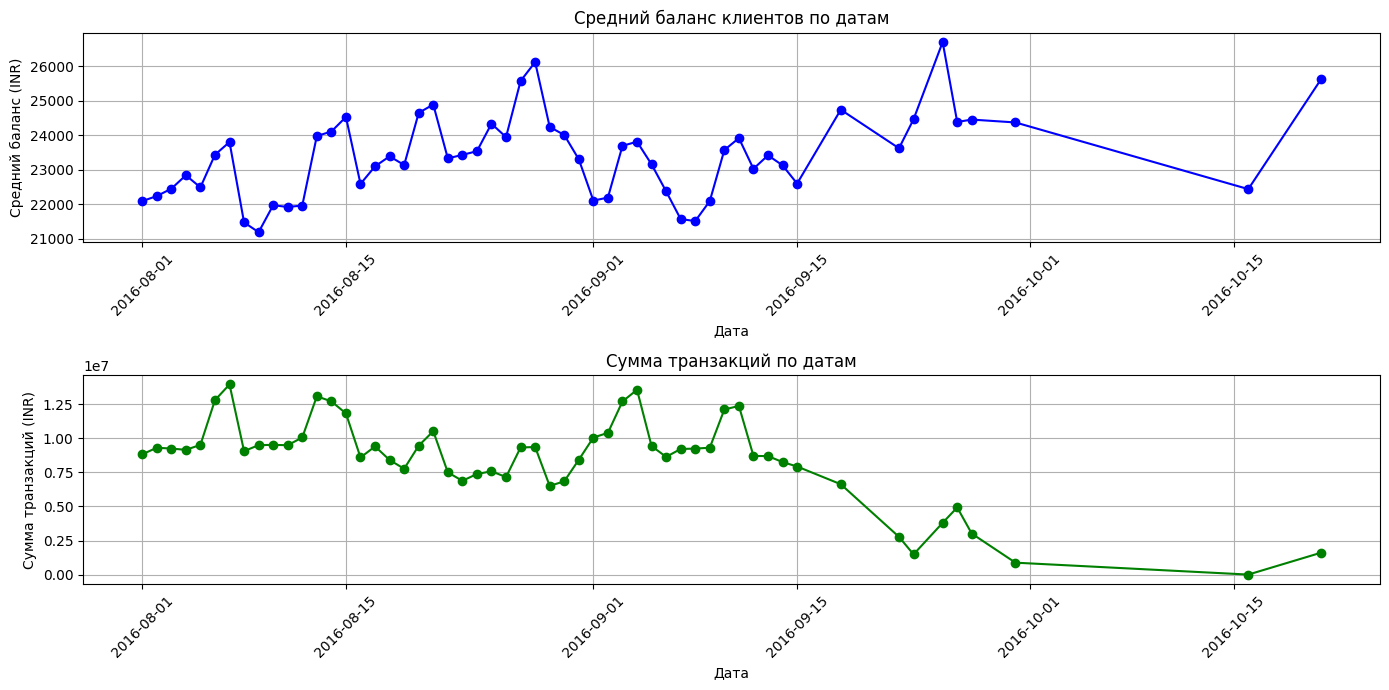

In [ ]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что df уже загружен и содержит необходимые данные
# Убедитесь, что столбец transactiondate имеет тип datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Группируем данные по дате и рассчитываем средний баланс и сумму транзакций
daily_summary = df.groupby('transactiondate').agg(
    average_balance=('custaccountbalance', 'mean'),
    total_transaction_amount=('transactionamount(inr)', 'sum')
).reset_index()

# Создаем линейные диаграммы для обоих величин
plt.figure(figsize=(14, 7))

# Линейная диаграмма для среднего баланса
plt.subplot(2, 1, 1)
plt.plot(daily_summary['transactiondate'], daily_summary['average_balance'], color='blue', marker='o')
plt.title('Средний баланс клиентов по датам')
plt.xlabel('Дата')
plt.ylabel('Средний баланс (INR)')
plt.xticks(rotation=45)
plt.grid()

# Линейная диаграмма для суммы транзакций
plt.subplot(2, 1, 2)
plt.plot(daily_summary['transactiondate'], daily_summary['total_transaction_amount'], color='green', marker='o')
plt.title('Сумма транзакций по датам')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (INR)')
plt.xticks(rotation=45)
plt.grid()

# Настроим макет для лучшего отображения
plt.tight_layout()
plt.show()

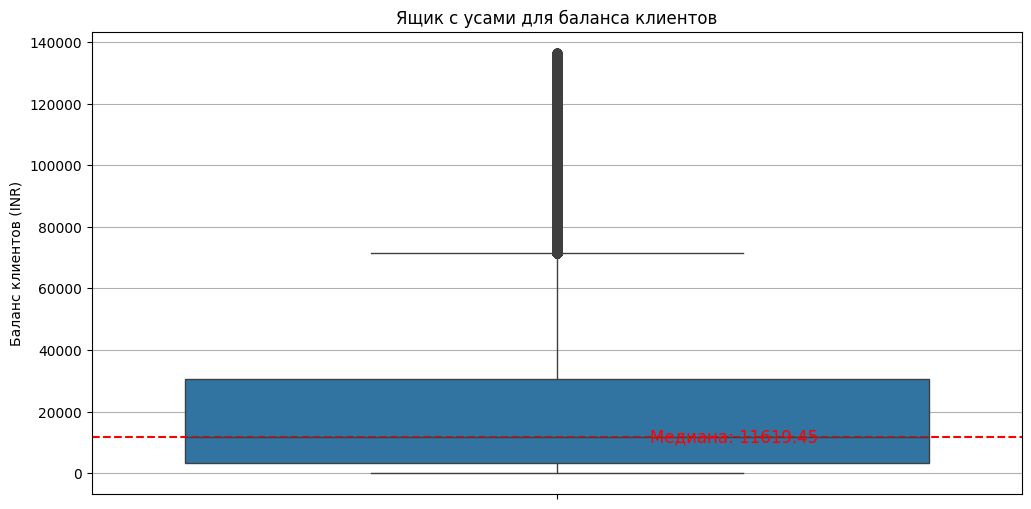

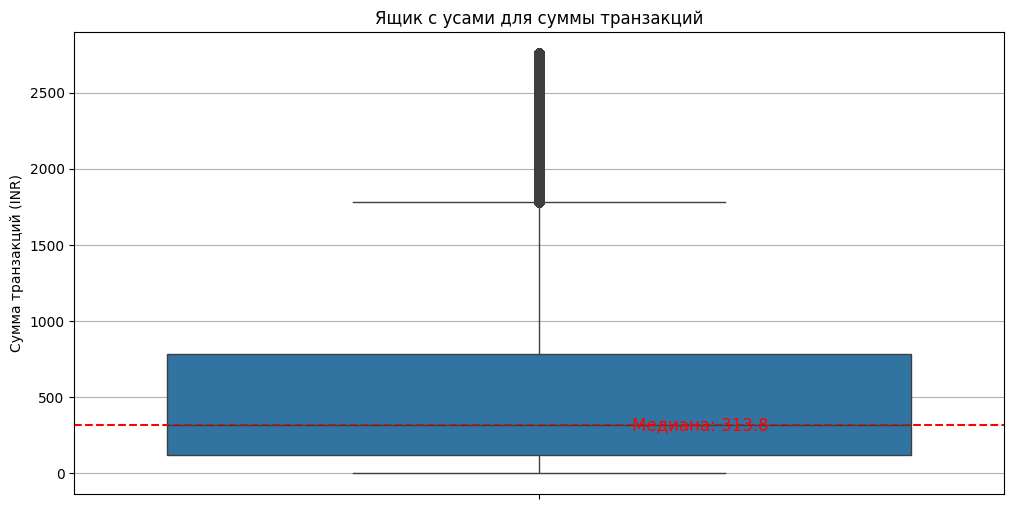

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Ящик с усами для `custaccountbalance`

plt.figure(figsize=(12, 6))
sns.boxplot(y=df['custaccountbalance'])
plt.title('Ящик с усами для баланса клиентов')
plt.ylabel('Баланс клиентов (INR)')
plt.grid(axis='y')

# Вычисляем медиану
median_value = df['custaccountbalance'].median()
# Добавляем линию для медианы
plt.axhline(median_value, color='red', linestyle='--')

# Подписываем значение медианы
plt.text(0.1, median_value, f'Медиана: {median_value}', color='red', fontsize=12, verticalalignment='center')

# Показать график
plt.show()

#Ящик с усами для `transactionamount(inr)`
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['transactionamount(inr)'])
plt.title('Ящик с усами для суммы транзакций')
plt.ylabel('Сумма транзакций (INR)')
plt.grid(axis='y')
# Вычисляем медиану
median_value = df['transactionamount(inr)'].median()
# Добавляем линию для медианы
plt.axhline(median_value, color='red', linestyle='--')

# Подписываем значение медианы
plt.text(0.1, median_value, f'Медиана: {median_value}', color='red', fontsize=12, verticalalignment='center')
# Показать график
plt.show()



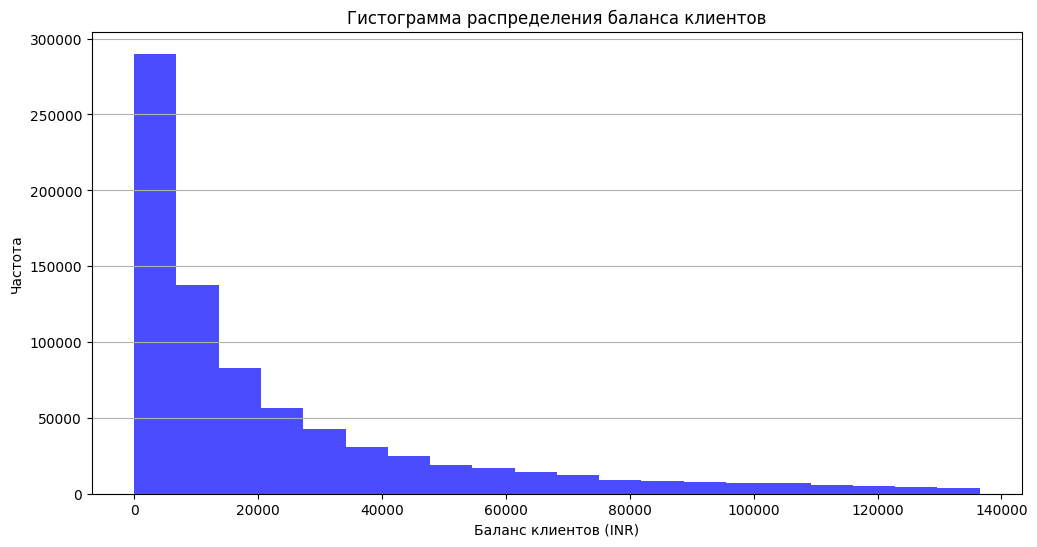

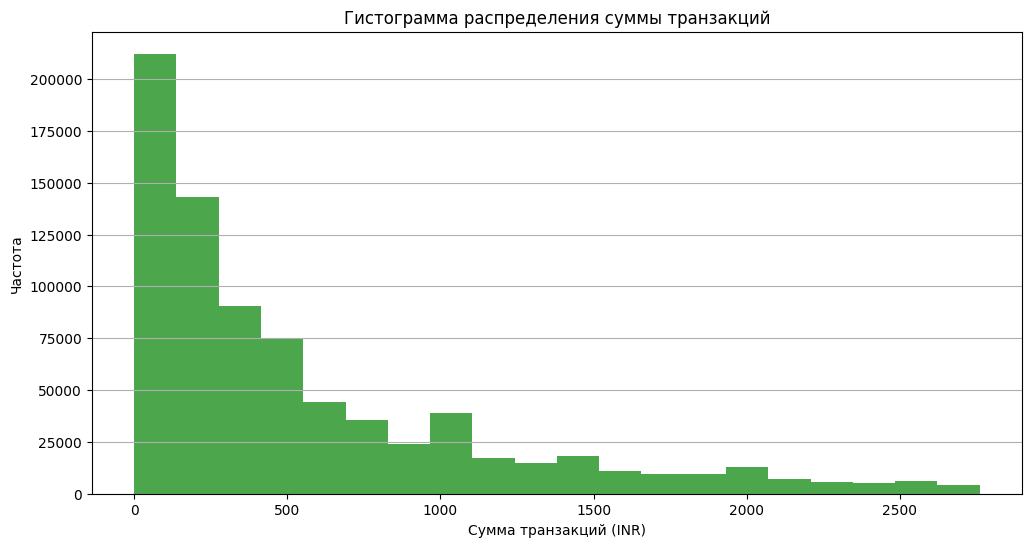

In [ ]:
#Гистограмма для `custaccountbalance`

def optimal_bins(data):
    return int(1 + 3.322 * np.log10(len(data)))

bins = optimal_bins(df['custaccountbalance'])

plt.figure(figsize=(12, 6))
plt.hist(df['custaccountbalance'], bins=bins, color='blue', alpha=0.7)
plt.title('Гистограмма распределения баланса клиентов')
plt.xlabel('Баланс клиентов (INR)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()


# Гистограмма для `transactionamount(inr)`


bins = optimal_bins(df['transactionamount(inr)'])

plt.figure(figsize=(12, 6))
plt.hist(df['transactionamount(inr)'], bins=bins, color='green', alpha=0.7)
plt.title('Гистограмма распределения суммы транзакций')
plt.xlabel('Сумма транзакций (INR)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

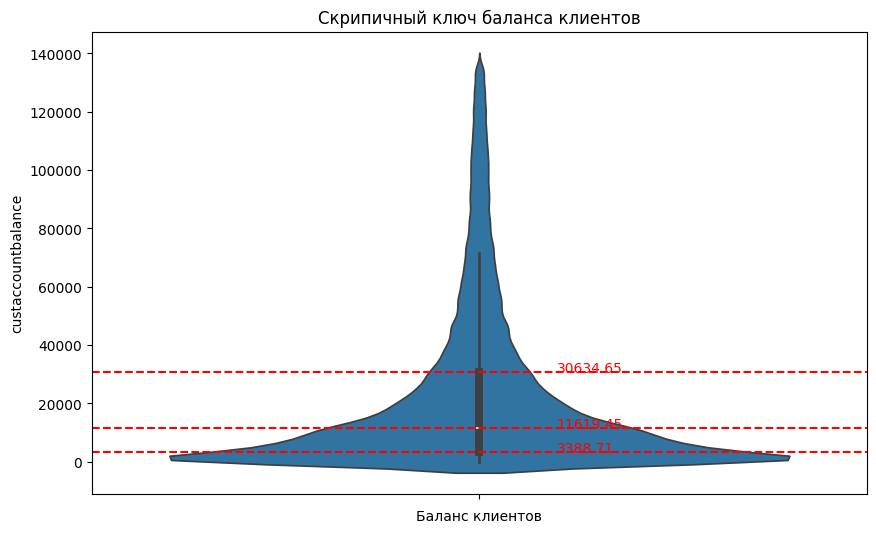

In [ ]:
#скрипичный ключ баланса клиентов
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(y='custaccountbalance', data=df)

# Рассчитаем квантильные значения
quantiles = df['custaccountbalance'].quantile([0.25, 0.5, 0.75])
for quantile in quantiles:
    plt.axhline(quantile, color='red', linestyle='--')
    plt.text(0.1, quantile, f'{quantile:.2f}', color='red')

plt.title('Скрипичный ключ баланса клиентов')
plt.xlabel('Баланс клиентов')

plt.grid(False)
plt.show()



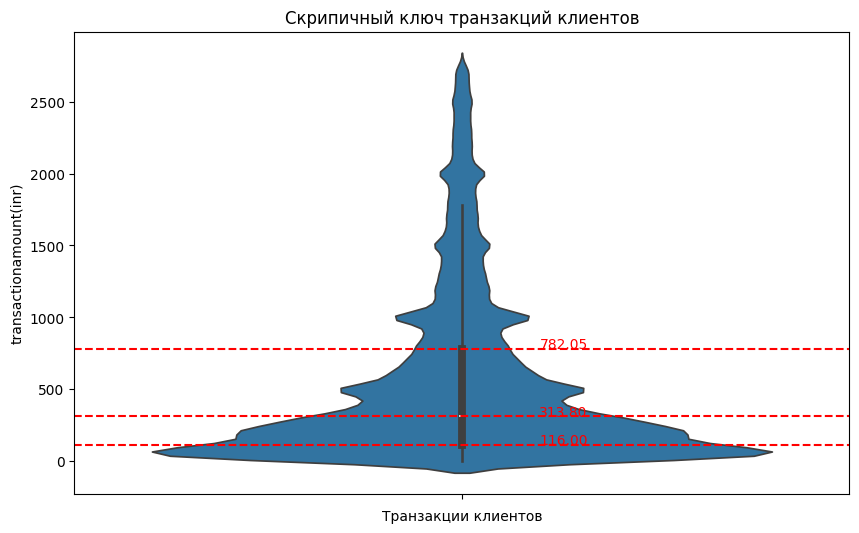

In [ ]:
#скрипичный ключ баланса клиентов
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(y='transactionamount(inr)', data=df)

# Рассчитаем квантильные значения
quantiles = df['transactionamount(inr)'].quantile([0.25, 0.5, 0.75])
for quantile in quantiles:
    plt.axhline(quantile, color='red', linestyle='--')
    plt.text(0.1, quantile, f'{quantile:.2f}', color='red')

plt.title('Скрипичный ключ транзакций клиентов')
plt.xlabel('Сумма транзакций клиентов')

plt.grid(False)
plt.show()


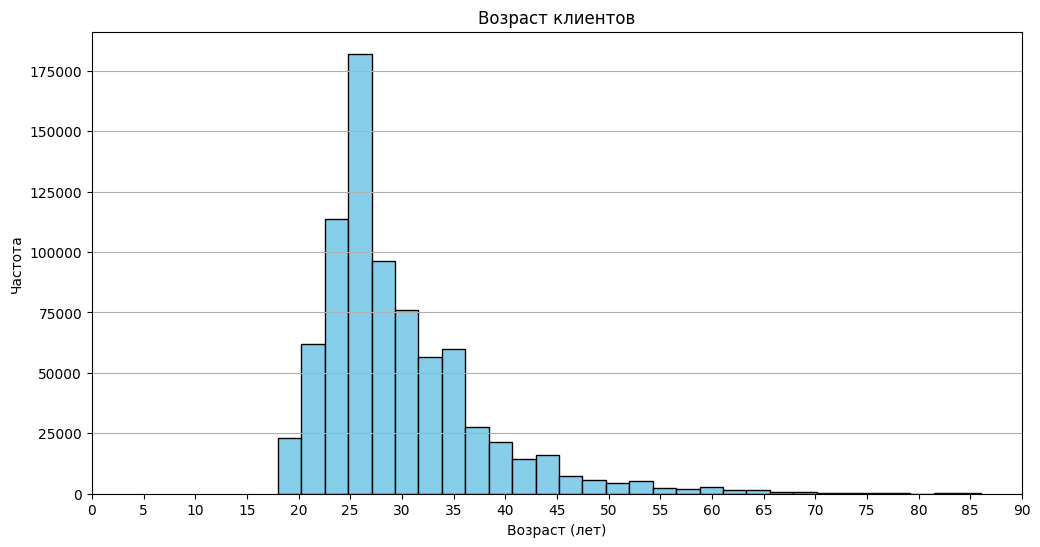

Ключевые статистики возраста клиентов:
count    785182.000000
mean         29.699026
std           7.872296
min          18.000000
25%          24.000000
50%          28.000000
75%          33.000000
max          86.000000
Name: age_on_transaction, dtype: float64


In [ ]:
# изучить возраст клиентов (визуализировать)
import pandas as pd
import matplotlib.pyplot as plt



# Удаление некорректных дат рождения
df = df[df['customerdob'] != pd.Timestamp('3700-01-01')]

# Удаление клиентов, родившихся после 1998 года (на 2016 г нет 18 лет)
df = df[df['customerdob'] <= pd.Timestamp('1998-01-01')]

# Расчет возраста на дату транзакции
df['age_on_transaction'] = df.apply(lambda row: (row['transactiondate'] - row['customerdob']).days // 365, axis=1)

# Визуализация распределения возраста клиентов
plt.figure(figsize=(12, 6))
plt.hist(df['age_on_transaction'], bins=30, color='skyblue', edgecolor='black')
plt.title('Возраст клиентов')
plt.xlabel('Возраст (лет)')
plt.ylabel('Частота')
plt.grid(axis='y')

# Установка шкалы возраста с шагом 5
age_ticks = range(0, df['age_on_transaction'].max() + 5, 5)
plt.xticks(age_ticks)

# Подписывание меток
plt.xticks(age_ticks, [str(age) for age in age_ticks])

plt.show()

# Ключевые статистики по возрасту клиентов
print("Ключевые статистики возраста клиентов:")
print(df['age_on_transaction'].describe())




In [ ]:
# изучить пол клиентов (визуализировать)

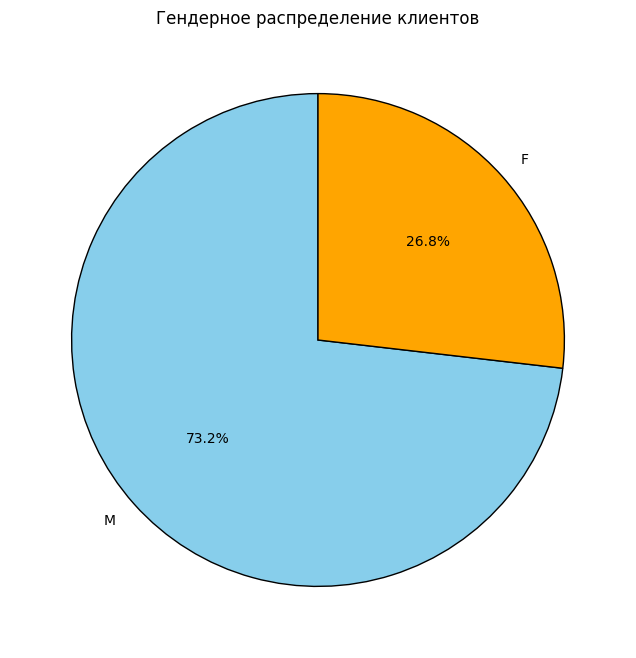

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчитаем количество клиентов по полу
gender_counts = df['custgender'].value_counts()

# Построим круговую диаграмму
plt.figure(figsize=(8, 8))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Гендерное распределение клиентов')
plt.ylabel('')  # Убираем подпись оси
plt.show()


In [ ]:
# изучить место жительства клиентов (визуализировать)

<ipython-input-142-7757bb85c5d9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis', orient='h')


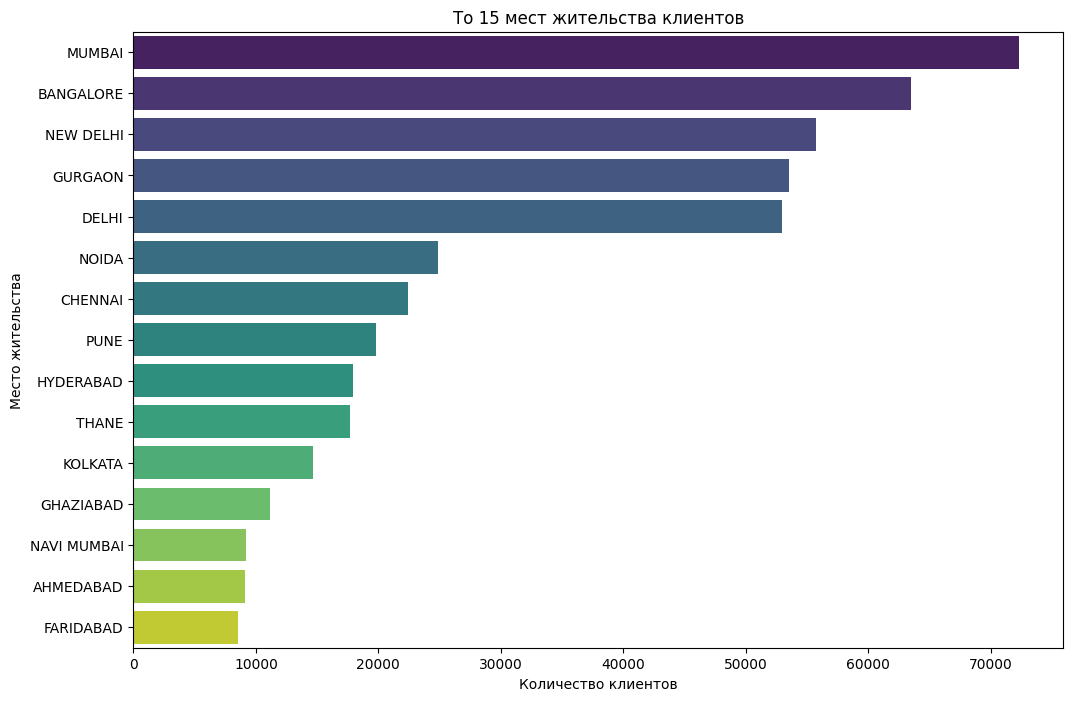

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчитаем количество клиентов по месту жительства и выберем топ-15
top_locations = df['custlocation'].value_counts().head(15)

# Построим столбчатую диаграмму для топ-15 мест
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis', orient='h')
plt.title('То 15 мест жительства клиентов')
plt.xlabel('Количество клиентов')
plt.ylabel('Место жительства')
plt.show()



In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr),age_on_transaction,transaction_month,age_group,transactiontime_minutes
0,T1,C5841053,1994-01-10 00:00:00,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,2016-08,"[20, 25)",2.386783
2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19,2016-08,"[15, 20)",2.378533
4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,2016-08,"[25, 30)",3.019267
5,T6,C1536588,1972-10-08 00:00:00,F,ITANAGAR,53609.20,2016-08-02,173940,676.0,43,2016-08,"[40, 45)",2.899000
6,T7,C7126560,1992-01-26 00:00:00,F,MUMBAI,973.46,2016-08-02,173806,566.0,24,2016-08,"[20, 25)",2.896767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048561,T1048562,C1034220,1992-11-19 00:00:00,M,BANGALORE,1212.70,2016-09-18,184734,1500.0,23,2016-09,"[20, 25)",3.078900
1048562,T1048563,C8020229,1990-04-08 00:00:00,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26,2016-09,"[25, 30)",3.080400
1048563,T1048564,C6459278,1992-02-20 00:00:00,M,NASHIK,27311.42,2016-09-18,183734,460.0,24,2016-09,"[20, 25)",3.062233
1048565,T1048566,C6420483,1978-08-30 00:00:00,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38,2016-09,"[35, 40)",3.078433


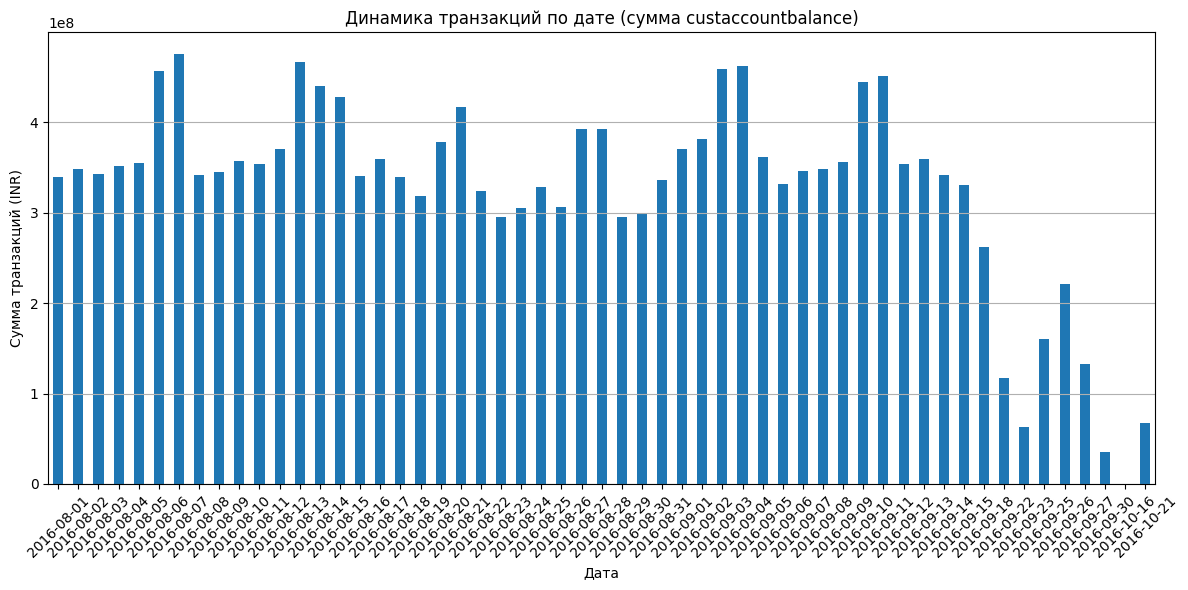

In [ ]:
# Убедитесь, что transactiondate в формате datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Группировка по дате и суммирование custaccountbalance
transaction_sum = df.groupby(df['transactiondate'].dt.date)['custaccountbalance'].sum()

# Построим гистограмму
plt.figure(figsize=(12, 6))
transaction_sum.plot(kind='bar')

# Настройка заголовка и меток
plt.title('Динамика транзакций по дате (сумма custaccountbalance)')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (INR)')

# Настройка меток на оси X
plt.xticks(rotation=45)  # Повернуть метки по оси X для лучшей читаемости
plt.gca().set_xticklabels(transaction_sum.index, rotation=45)

plt.grid(axis='y')  # Сетка по оси Y
plt.tight_layout()  # Автоматически подгоняет размеры графика
plt.show()

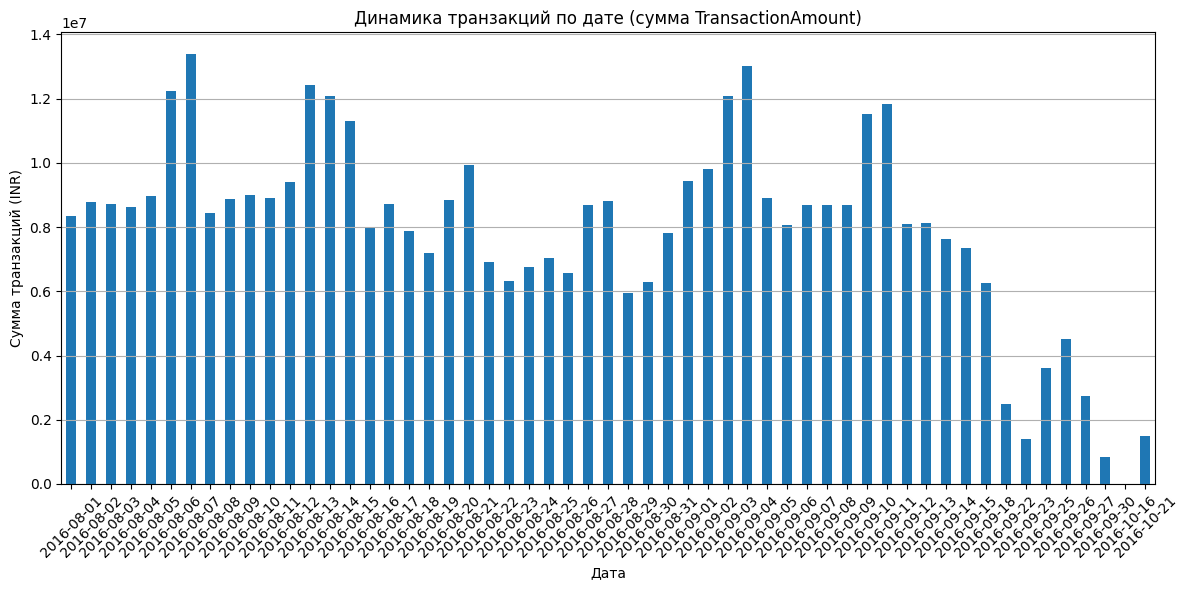

In [ ]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Создаем сводную таблицу, чтобы подсчитать сумму transactionamount по дате
transaction_sum = df.groupby(df['transactiondate'].dt.date)['transactionamount(inr)'].sum()

# Построим гистограмму
plt.figure(figsize=(12, 6))
transaction_sum.plot(kind='bar')

# Настройка заголовка и меток
plt.title('Динамика транзакций по дате (сумма TransactionAmount)')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (INR)')

# Настройка формата отображения дат на оси X
plt.xticks(rotation=45)  # Повернуть метки по оси X для лучшей читаемости
plt.gca().set_xticklabels(transaction_sum.index, rotation=45)

plt.grid(axis='y')  # Сетка по оси Y
plt.tight_layout()  # Автоматически подгоняет размеры графика
plt.show()

<ipython-input-143-35282683aecc>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_payment = df.groupby('age_group')['transactionamount(inr)'].mean()


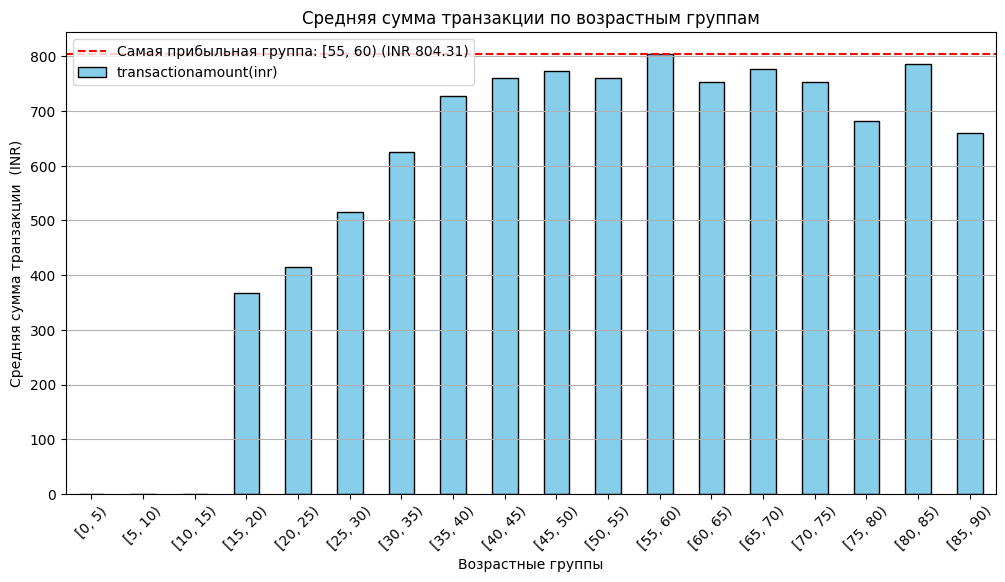

Самая платежеспособная группа: [55, 60), средняя сумма транзакций: INR 804.31


In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Вычисление возраста клиентов на дату транзакции
df['age_on_transaction'] = df.apply(lambda row: (row['transactiondate'] - row['customerdob']).days // 365, axis=1)

# Разделение клиентов на возрастные корзины с шагом 5 лет
age_bins = np.arange(0, df['age_on_transaction'].max() + 5, 5)
df['age_group'] = pd.cut(df['age_on_transaction'], bins=age_bins, right=False)

# Вычисление средней суммы транзакций для каждой возрастной группы
age_group_payment = df.groupby('age_group')['transactionamount(inr)'].mean()

# Определение самой платежеспособной группы
most_profitable_group = age_group_payment.idxmax()
most_profitable_value = age_group_payment.max()

# Визуализация средней суммы транзакций по возрастным группам
plt.figure(figsize=(12, 6))
age_group_payment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Средняя сумма транзакции по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Средняя сумма транзакции  (INR)')
plt.axhline(most_profitable_value, color='red', linestyle='--', label=f'Самая прибыльная группа: {most_profitable_group} (INR {most_profitable_value:.2f})')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Вывод данных о самой платежеспособной группе
print(f"Самая платежеспособная группа: {most_profitable_group}, средняя сумма транзакций: INR {most_profitable_value:.2f}")


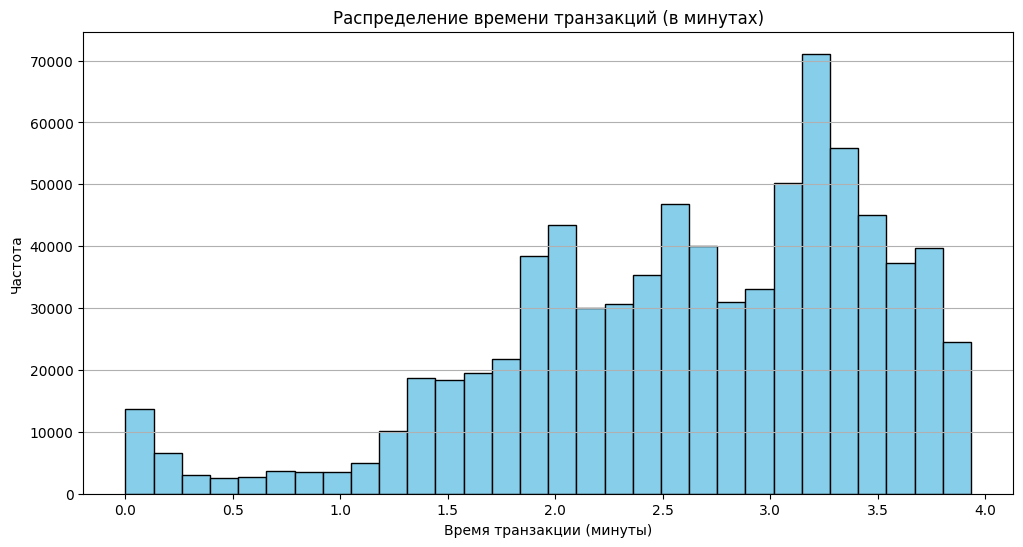

Ключевые статистики времени транзакций (в минутах):
count    785182.000000
mean          2.617476
std           0.866257
min           0.000017
25%           2.057167
50%           2.742267
75%           3.340733
max           3.932650
Name: transactiontime_minutes, dtype: float64


In [ ]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что transactiontime хранит время в миллисекундах
# Переведём transactiontime из миллисекунд в минуты
df['transactiontime_minutes'] = df['transactiontime'] / (1000 * 60)

# Построим гистограмму распределения времени транзакций
plt.figure(figsize=(12, 6))
plt.hist(df['transactiontime_minutes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

# Дополнительно можно вывести ключевые статистики
print("Ключевые статистики времени транзакций (в минутах):")
print(df['transactiontime_minutes'].describe())

# Выводы
Предоставленная выборка не достаточно информативна, чтобы делать правильные выводы и формировать предложения для дальнейшего развития банка.
Однако, даже по приведенным данным можно сделать следующий вывод:
	Исследуемые данные относятся вероятно к Индии.
	Большая часть клиентов – это мужчины, что скорее всего связано с менталитетом страны.
	Наибольшее количество транзакций приходится на наиболее развитые города страны.
	Наиболее платежеспособными являются клиенты в возрасте от 55 до 60 лет, однако наибольшее число операций совершают в возрасте от 25 до 28 лет.
Можно предлагать молодым клиентам сберегающие/накопительные программы, чтобы увеличить остатки на счетах в банке.
Для взрослого контингента и для привлечения женщин увеличить количество партнерских программ, для увеличения количества транзакций.
Для менее развитых городов или с меньшей численностью также рассмотреть возможность он-лайн сервисов.



In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка